In [17]:
from ROOT import TH1F, TCanvas, TF1

In [2]:
import numpy as np

In [139]:
data = np.load("/Users/cdesio/Downloads/out_data_300-2.npz")

In [140]:
for k in data.iterkeys():
    print(k)

y_gt
preds_gt
y_unet
preds_unet
y_15_unet
preds_15_unet
y_15_gt
preds_15_gt


/Users/cdesio/UoB/MAPS/gate_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  """Entry point for launching an IPython kernel.


In [141]:
y_gt = data["y_gt"]
preds_gt = data["preds_gt"]

In [142]:
mean = np.mean(y_gt-preds_gt)

In [143]:
mean

-0.0005555555555555573

In [144]:
histo_gt = TH1F("data","Distribution of prediction errors for ground truth", 50,-1.0,1.0)

Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).


In [145]:
for i in (y_gt-preds_gt):
    histo_gt.Fill(i)

In [146]:
c = TCanvas()

In [147]:
f = TF1("f","gaus")
f.FixParameter(1,mean)

In [148]:
histo_gt.Fit(f, "S")

 FCN=1.99861 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.55844e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.37143e+02   1.54060e+01   1.29972e-02   7.11353e-07
   2  Mean         1.91667e-02     fixed    
   3  Sigma        2.39417e-02   2.19264e-03   3.02284e-05   4.94022e-03


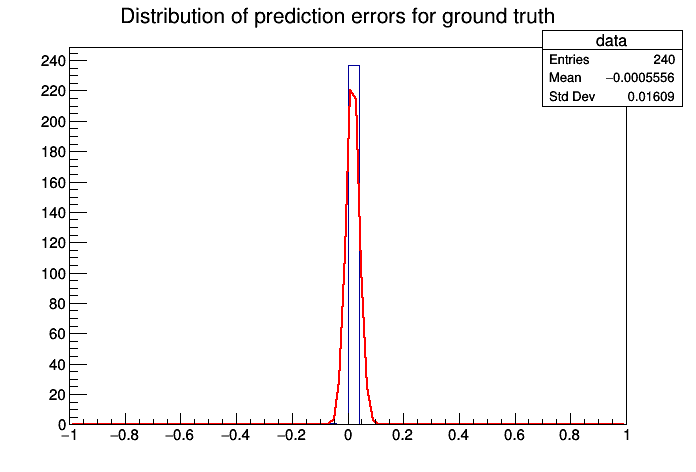

In [149]:
histo_gt.Draw()
c.Draw()

In [151]:
y_unet = data["y_unet"]
preds_unet = data["preds_unet"]

mean_unet = np.mean(y_unet-preds_unet)


 FCN=31 FROM MIGRAD    STATUS=CONVERGED     743 CALLS         744 TOTAL
                     EDM=1.15464e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.63078e+09   1.59370e+10   2.68496e+03  -3.74793e-14
   2  Mean        -7.40264e-02     fixed    
   3  Sigma        1.26312e-02   1.03045e-03   6.69184e-07  -6.51384e-02


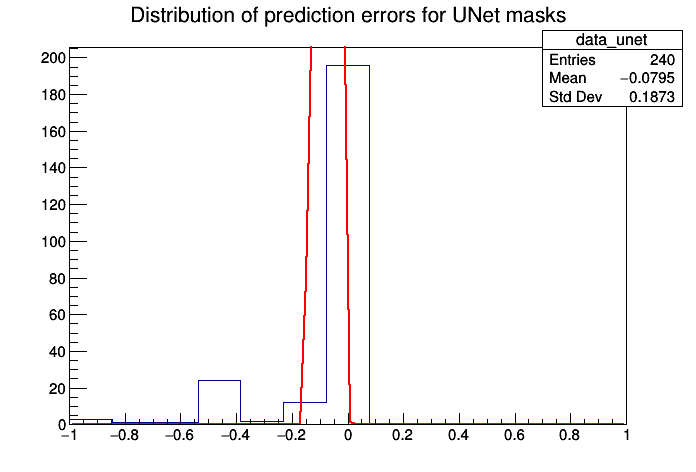

In [152]:
del histo_unet
histo_unet = TH1F("data_unet","Distribution of prediction errors for UNet masks", 13,-1.0,1.0)
for i in (y_unet-preds_unet):
    histo_unet.Fill(i)

c_unet = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_unet)

histo_unet.Fit(f, "S")
    
yax=histo_unet.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_unet.Draw()
c_unet.Draw()

 FCN=6.99574 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=5.13124e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.69143e+02   1.64141e+01   2.17074e-02  -8.17375e-07
   2  Mean         3.24444e-01     fixed    
   3  Sigma        2.67185e-01   9.16177e-03   1.47866e-05   2.27725e-03


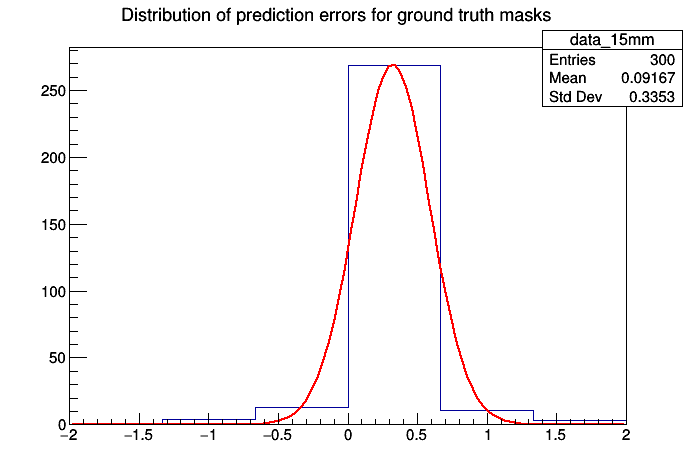

In [160]:
y_15_gt = data["y_15_gt"]
preds_15_gt = data["preds_15_gt"]

mean_15_gt = np.mean(y_15_gt-preds_15_gt)

#del histo_15_gt
histo_15_gt = TH1F("data_15mm","Distribution of prediction errors for ground truth masks", 6,-2.0,2.0)
for i in (y_15_gt-preds_15_gt):
    histo_15_gt.Fill(i)

c_15_gt = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_15_gt)

histo_15_gt.Fit(f, "S")
    
yax=histo_15_gt.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_15_gt.Draw()
c_15_gt.Draw()

 FCN=8.34272 FROM MIGRAD    STATUS=CONVERGED      47 CALLS          48 TOTAL
                     EDM=3.52536e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.10555e+01   6.14526e+00   7.08448e-03  -3.23921e-05
   2  Mean         6.66667e-02     fixed    
   3  Sigma        8.30736e-01   7.20681e-02   3.90784e-05  -1.01128e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm_unet (Potential memory leak).


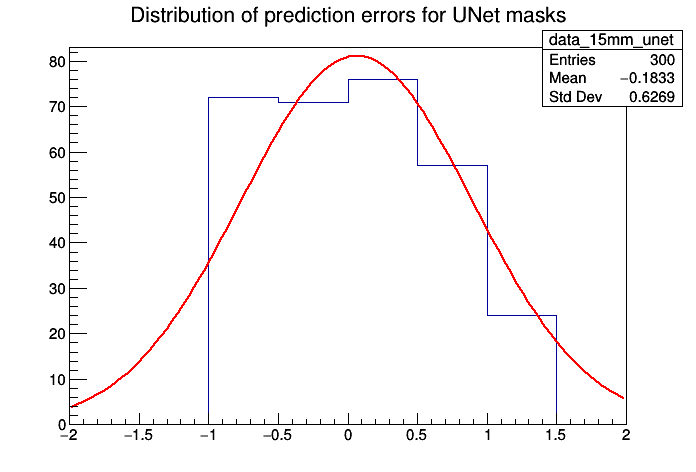

In [159]:
y_15_unet = data["y_15_unet"]
preds_15_unet = data["preds_15_unet"]

mean_15_unet = np.mean(y_15_unet-preds_15_unet)

#del histo_15_gt
histo_15_unet = TH1F("data_15mm_unet","Distribution of prediction errors for UNet masks", 8,-2.0,2.0)
for i in (y_15_unet-preds_15_unet):
    histo_15_unet.Fill(i)

c_15_unet = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_15_unet)

histo_15_unet.Fit(f, "S")
    
yax=histo_15_unet.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_15_unet.Draw()
c_15_unet.Draw()